In [27]:
from google.colab.files import upload
# Final Project Part II: Visual Chatbot

import random
import re
import nltk
nltk.download('book')

# Import library about openCV
import cv2
import numpy as np
import matplotlib . pyplot as plt

from skimage.metrics import structural_similarity as compare_ssim
import argparse
import imutils

# Import image recognize
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# insert training of naive bayes
nltk.download('names')

# define feature function
def gender_features(word):
  return {'last_letter': word[-1]}

# import list of training data (labeled names)
from nltk.corpus import names
labeled_names = ([(name, 'male') for name in names.words('male.txt')] + 
                 [(name, 'female') for name in names.words('female.txt')])

# convert training dataset into feature dataset
featuresets = [(gender_features(n),gender) for (n,gender) in labeled_names]

# training
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

# testing
print(classifier.classify(gender_features('Neo')))
print(classifier.classify(gender_features('Lily')))


# Translation import
from nltk.corpus import swadesh
en2it = swadesh.entries(['en', 'it'])
en2es = swadesh.entries(['en', 'es'])
en2fr = swadesh.entries(['en', 'fr'])
en2sl = swadesh.entries(['en', 'sl'])


# Sentences we'll respond with if the user greeted us
GREETING_KEYWORDS = ("hello", "hi", "greetings", "sup", "what's up",)
GREETING_RESPONSES = ["'sup", "hey", "hey you get my text?"]

YESORNOT_RESPONSES = ["Ok I know now.", 
                      "All right.", 
                      "That's not bad, I like it too.", 
                      "Really? Glad to hear you say that."]

STORY_RESPONSES = ["A wild boar was rubbing his tusks against a tree. A fox passing by asked him what he was doing. 'My tusks are my weapons,' said the boar. 'I'm sharpening them.' 'Why waste time sharpening your weapons when there's no danger in sight?' said the fox. 'You're being foolish.' Just then a hunter appeared on the scene. Frightened by the boar's sharpened tusks, he turned on the fox instead and shot him dead.", 
                   "Let us enjoy reading this one of Aesop’s Fables of Defeated by Pride . Two roosters fought for supremacy in the farmyard. Finally one was vanquished and he went and hid himself in a corner of the hen-house. Defeated by PrideThe victor flew up to the roof of the barn and begin to crow, ‘I’ve won, I’ve won!’ An eagle swooped down and carried him away and the rooster that had been defeated suddenly found himself unchallenged master of the farmyard.", 
                   "Let us enjoy reading this one of Aesop’s Fables of Foxy Rooster . A fox sneaked into a farm and grabbed a prize rooster. The farmer saw him and raised the alarm and he and his dogs started chasing the thief. The fox, though he was holding the rooster in his mouth, was running very fast. 'Get him! Get him!' shouted the farmer to his dogs. 'No!' suddenly screamed the rooster. 'Don't come near me!' 'My master was very cruel to me,' explained the rooster to the fox. 'Tell him to stay away from me.' The fox was delighted. 'He wants you to stay away from him!' he shouted at the farmer, in the process releasing his hold on the rooster. The rooster flew up into a tree and stayed there till he was rescued by his master.", ]

JOKE_RESPONSES = ["What do kids play when their mom is using the phone? Bored games.", 
                  "What do you call an ant who fights crime? A vigilANTe!", 
                  "That's not bad, I like it too.", 
                  "Why are snails slow? Because they’re carrying a house on their back.",
                  "What does a storm cloud wear under his raincoat? Thunderwear.",
                  "What is fast, loud and crunchy? A rocket chip.",
                  "Why did the teddy bear say no to dessert? Because she was stuffed.",
                  "Name the kind of tree you can hold in your hand? A palm tree!",
                  "Why do plants hate math? Because it gives them square roots."]

#################### Visual Chatbot Section #################### 
# Example: check for a word "image" and respond to it.  
def check_for_image(sentence):
  if 'image' in sentence.lower():
    # load image and display it
    print("01 Upload image")
    print("02 Use image the Chatbot have")
    # choose the upload way
    c = input('Type the number of the way you want(for example 01): ')

    #################### 01 ####################
    if c == '01':
      from google.colab import files
      print("Upload your favorite image")
      uploaded = files.upload()
      i = uploaded.keys()
      img = cv2.imread(list(i)[0])
      img_Processing = cv2.imread(list(i)[0])
      plt.imshow(img)
      plt.show()

      state = 1
      while state == 1:
      # code on img for processing
        print("There is some function of this Visual Chatbot. if you want to do something, please type the number:")
        print("01 Convert the RGB")
        print("02 Convert the grayscale")
        print("03 Crop out part of the picture")
        print("04 Resizing images")
        print("05 Back to its original resolution")
        print("06 Display initial imput")
        print("07 Display current effect")
        print("08 Enter 08 or any text to quit")
        d = input('Type the function number(for example 01): ')

        if d == '01':
          output = "Convert the RGB"
          # convert the RGB
          img_Processing = cv2.cvtColor(img_Processing, cv2.COLOR_BGR2RGB)
          # display RGB image
          plt.imshow(img_Processing)
          plt.show()
        elif d == '02':
          # convert the RGB
          img_Processing = cv2.cvtColor(img_Processing, cv2.COLOR_BGR2GRAY)
          # display RGB image
          plt.imshow(img_Processing)
          plt.show()
          output = "Convert the grayscale"
        elif d == '03':
          # Show the pixel
          print(img_Processing.shape)
          h, w, c = img_Processing.shape
          print('width:  ', w)
          print('height: ', h)
          print('channel:', c)
          H_LOW = int(h/4)
          H_HIGH = int(h/4 * 3)
          W_LOW = int(w/4)
          W_HIGH = int(w/4 * 3)
          # Cropping an image
          img_Processing = img_Processing[H_LOW:H_HIGH, W_LOW:W_HIGH]
          plt.imshow(img_Processing)
          plt.show()
          output = "Crop out part of the picture"
        elif d == '04':
          p = 0.1
          w = int(img_Processing.shape[1] * p)
          h = int(img_Processing.shape[0] * p)
          img_Processing = cv2.resize(img_Processing, (w, h))
          plt.imshow(img_Processing)
          plt.show()
          output = "Resizing images"
        elif d == '05':
          img_Processing = cv2.resize(img_Processing, (10 * w, 10 * h), fx = 10, fy = 10, interpolation=cv2.INTER_CUBIC)
          plt.imshow(img_Processing)
          plt.show()
          output = "Back to its original resolution"
        elif d == '06':
          plt.imshow(img)
          plt.show()
          output = "Display initial imput"
        elif d == '07':
          plt.imshow(img_Processing)
          plt.show()
          output = "Display current effect"
        elif d == '08':
          output = "Quit"
          state = 0
        else:
          output = "Quit"
          state = 0
          return output

    #################### 02 ####################
    elif c == '02':
      img = cv2.imread('Human_male_portrait.jpeg')
      img_Processing = cv2.imread('Human_male_portrait.jpeg')
      plt.imshow(img)
      plt.show()

      state = 1
      while state == 1:
      # code on img for processing
        print("There is some function of this Visual Chatbot. if you want to do something, please type the number:")
        print("01 Convert the RGB")
        print("02 Convert the grayscale")
        print("03 Crop out part of the picture")
        print("04 Resizing images")
        print("05 Back to its original resolution")
        print("06 Display initial imput")
        print("07 Display current effect")
        print("08 Enter 08 or any text to quit")
        d = input('Type the function number(for example 01): ')

        if d == '01':
          output = "Convert the RGB"
          # convert the RGB
          img_Processing = cv2.cvtColor(img_Processing, cv2.COLOR_BGR2RGB)
          # display RGB image
          plt.imshow(img_Processing)
          plt.show()
        elif d == '02':
          # convert the RGB
          img_Processing = cv2.cvtColor(img_Processing, cv2.COLOR_BGR2GRAY)
          # display RGB image
          plt.imshow(img_Processing)
          plt.show()
          output = "Convert the grayscale"
        elif d == '03':
          # Show the pixel
          print(img_Processing.shape)
          h, w, c = img_Processing.shape
          print('width:  ', w)
          print('height: ', h)
          print('channel:', c)
          H_LOW = int(h/4)
          H_HIGH = int(h/4 * 3)
          W_LOW = int(w/4)
          W_HIGH = int(w/4 * 3)
          # Cropping an image
          img_Processing = img_Processing[H_LOW:H_HIGH, W_LOW:W_HIGH]
          plt.imshow(img_Processing)
          plt.show()
          output = "Crop out part of the picture"
        elif d == '04':
          p = 0.1
          w = int(img_Processing.shape[1] * p)
          h = int(img_Processing.shape[0] * p)
          img_Processing = cv2.resize(img_Processing, (w, h))
          plt.imshow(img_Processing)
          plt.show()
          output = "Resizing images"
        elif d == '05':
          img_Processing = cv2.resize(img_Processing, (10 * w, 10 * h), fx = 10, fy = 10, interpolation=cv2.INTER_CUBIC)
          plt.imshow(img_Processing)
          plt.show()
          output = "Back to its original resolution"
        elif d == '06':
          plt.imshow(img)
          plt.show()
          output = "Display initial imput"
        elif d == '07':
          plt.imshow(img_Processing)
          plt.show()
          output = "Display current effect"
        elif d == '08':
          output = "Quit"
          state = 0
        else:
          output = "Quit"
          state = 0
          return output

    #################### else ####################
    else:
      output = "Nothing happen"
      return output
#################### Visual Chatbot Section ####################

def check_for_imageProject(sentence):
  if 'recognize' in sentence.lower():
    from google.colab import files
    print("This function is to recognize your own images, you could upload cat or dog picture.")
    uploaded = files.upload()
    i = uploaded.keys()
    img = cv2.imread(list(i)[0])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

    # Load the model
    model = load_model('keras_model.h5', compile=False)

    # Create the array of the right shape to feed into the keras model
    # The 'length' or number of images you can put into the array is
    # determined by the first position in the shape tuple, in this case 1.
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

    # Convert cv2 image to pil image
    image = Image.fromarray(img)
    
    #resize the image to a 224x224 with the same strategy as in TM2:
    #resizing the image to be at least 224x224 and then cropping from the center
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)

    #turn the image into a numpy array
    image_array = np.asarray(image)
    # Normalize the image
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    # Load the image into the array
    data[0] = normalized_image_array
    # run the inference
    prediction = model.predict(data)
    print(prediction)

    if (prediction[0][0] > 0.85):
      # print("cat")
      content = "cat"

    if (prediction[0][1] > 0.85):
      # print("dog")
      content = "dog"

    output = "The image is " + content + "."
    return output

# Translation from English to Italian
def check_for_translation(sentence):
    KEYPHRASES = ["translate"]
    for word in sentence.split(" "):
        if word.lower() in KEYPHRASES:

            b = input('Translate from English to Italian: ')
            translate = dict(en2it)

            try:
                output = f"English: {b}" + "   " + f"Italian: {translate[b]}"
                return output
            except:
                output = "Sorry, I can not translate it."
                return output

# Check for gender by training of naive bayes
def check_for_gender(sentence):
    KEYPHRASES = ["gender"]
    for word in sentence.split(" "):
        if word.lower() in KEYPHRASES:

            b = input('Type your name: ')
            output = "I think you are " + classifier.classify(gender_features(b))
            return output


#If any of the words in the user's input was a greeting, return a greeting response
def check_for_greeting(sentence):
    for word in sentence.split(" "):
        if word.lower() in GREETING_KEYWORDS:
            return random.choice(GREETING_RESPONSES)
  
# Example: check for a word "dog" and respond to it.  
def check_for_dog(sentence):
    KEYPHRASES = ["dog"]
    for word in sentence.split(" "):
        if word.lower() in KEYPHRASES:
            return "Do you like dog?"
          
# Example: check for a word "cat" and respond to it.  
def check_for_cat(sentence):
    KEYPHRASES = ["cat"]
    for word in sentence.split(" "):
        if word.lower() in KEYPHRASES:
            return "Do you like cat?"

# Example: check for a word "color" and respond to it.  
def check_for_color(sentence):
    KEYPHRASES = ["red", "blue", "green", "black", "white", "yellow", "blue", "pink", "gray", "brown", "orange", "purple"]
    for word in sentence.split(" "):
        if word.lower() in KEYPHRASES:
            return "Do you like this color?"

# Example: check for a word "yes" or "no" and respond to it.  
def check_for_yesornot(sentence):
    KEYPHRASES = ["yes", "no"]
    for word in sentence.split(" "):
        if word.lower() in KEYPHRASES:
            return random.choice(YESORNOT_RESPONSES)

# Example: get your chatbot to tell a story. The \n command
# starts a new line (useful to make the ouptut readable.)
def tellstory(sentence):
    KEYPHRASES = ["story"]
    for word in sentence.split(" "):
        if word.lower() in KEYPHRASES:
            return random.choice(STORY_RESPONSES)

# The ability to make jokes or aphorisms, witty sayings
def telljoke(sentence):
    KEYPHRASES = ["joke", "aphorisms"]
    for word in sentence.split(" "):
      if word.lower() in KEYPHRASES:
            return random.choice(JOKE_RESPONSES)

# The ability to answer some direct questions factually
def answerQuestion(sentence):
    if 'what' in sentence.lower() and 'color' in sentence.lower():
      return "My favorite color is red."
    elif 'what' in sentence.lower() and 'pet' in sentence.lower():
      return "My favorite color is dog."
    elif 'what' in sentence.lower() and 'weather' in sentence.lower():
      return "Sunny."
    elif 'what' in sentence.lower() and 'your' in sentence.lower():
      return "My name is Chatbot."

# Answer about ASU
def answerAboutASU(sentence):
    if 'what' in sentence.lower() and 'asu' in sentence.lower():
       return "Arizona State University is a public research university in the Phoenix metropolitan area. Founded in 1885 by the 13th Arizona Territorial Legislature."
    elif 'do' in sentence.lower() and 'asu' in sentence.lower():
        return "Yes, of course."
    elif 'what' in sentence.lower() and 'ame' in sentence.lower():
       return "Arts, Media and Engineering is a collaborative initiative between the ASU Herberger Institute for Design and the Arts and the ASU Ira A. Fulton Schools of Engineering. We are a leading transdisciplinary program in digital media."
    elif 'do' in sentence.lower() and 'ame' in sentence.lower():
        return "Yes, of course."
    elif 'arts' in sentence.lower() and 'media' in sentence.lower() and 'and' in sentence.lower() and 'engineering' in sentence.lower():
      return "Could you tell me more?"

   
# Reflections swap the users pronouns back at them. For instance, if the user
# says: "I need you". The response will flip "I -> you", "you -> me", so the 
# bot will say "you need me". 
reflections = {
    "am": "are",
    "was": "were",
    "i": "you",
    "i'd": "you would",
    "i've": "you have",
    "i'll": "you will",
    "my": "your",
    "are": "am",
    "you've": "I have",
    "you'll": "I will",
    "your": "my",
    "yours": "mine",
    "you": "me",
    "me": "you"
}

# This function looks for the starting phrase, and then takes the rest of the 
# user's sentence after the phrase and puts it in variable 0
psychobabble = [
    [r'I need (.*)',
     ["Why do you need {0}?",
      "Would it really help you to get {0}?",
      "Are you sure you need {0}?"]],
    
    [r'Who are you?',
     ["Insert Biography"]], 
    
    [r'I like (.*)',
     ["Why do you like {0}?"]],
 
    [r'Why don\'?t you ([^\?]*)\??',
     ["Do you really think I don't {0}?",
      "Perhaps eventually I will {0}.",
      "Do you really want me to {0}?"]],
      
    [r'I want (.*)',
     ["TEST"]],
    # This must be the last block
    [r'(.*)',
     ["Please tell me more.",
      "Let's change focus a bit... Tell me about your family.",
      "Can you elaborate on that?",
      "Why do you say that {0}?",
      "I see.",
      "Very interesting.",
      "{0}.",
      "I see. And what does that tell you?",
      "How does that make you feel?",
      "How do you feel when you say that?"]],
]
        
     
def reflect(fragment):
    tokens = fragment.lower().split()
    for i, token in enumerate(tokens):
        if token in reflections:
            tokens[i] = reflections[token]
    return ' '.join(tokens)
 
def analyze(statement):
    for pattern, responses in psychobabble:
        match = re.match(pattern, statement.rstrip(".!"))
        if match:
            response = random.choice(responses)
            return response.format(*[reflect(g) for g in match.groups()])

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

User: recognize
This function is to recognize your own images, you could upload cat or dog picture.


Saving cat03.jpeg to cat03.jpeg


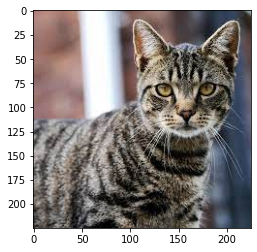

[[9.999918e-01 8.174013e-06]]
Bot:  The image is cat.
User: recognize
This function is to recognize your own images, you could upload cat or dog picture.


Saving dog03.jpeg to dog03.jpeg


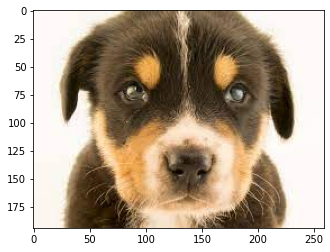

[[5.5319047e-06 9.9999452e-01]]
Bot:  The image is dog.


In [ ]:
## This is the main part of the Chatbot code, checks for phrases, words, and 
## prints responses

# Ask the user for input
a =  input('User: ')

while (a.split(" ")[0] != 'quit' and a.split(" ")[0] != 'Quit'):
    spoke = 0

    z =  check_for_image(a)
    if z != None:
        print('Bot: ', z)
        spoke = 1

    z =  check_for_greeting(a)
    if z != None:
        print('Bot: ', z)
        spoke = 1
    
    z = check_for_dog(a)
    if z!= None:
        print('Bot: ', z)
        spoke = 1

    z = check_for_cat(a)
    if z!= None:
        print('Bot: ', z)
        spoke = 1

    z = check_for_color(a)
    if z!= None:
        print('Bot: ', z)
        spoke = 1

    z = check_for_yesornot(a)
    if z!= None:
        print('Bot: ', z)
        spoke = 1

    z = tellstory(a)
    if z!= None:
        print('Bot: ', z)
        spoke = 1

    z = telljoke(a)
    if z!= None:
        print('Bot: ', z)
        spoke = 1

    z = answerQuestion(a)
    if z!= None:
        print('Bot: ', z)
        spoke = 1

    z = check_for_translation(a)
    if z!= None:
        print('Bot: ', z)
        spoke = 1

    z = check_for_gender(a)
    if z!= None:
        print('Bot: ', z)
        spoke = 1

    z = answerAboutASU(a)
    if z!= None:
        print('Bot: ', z)
        spoke = 1

    z = check_for_imageProject(a)
    if z!= None:
        print('Bot: ', z)
        spoke = 1

    if spoke == 0:
        print('Bot: ', analyze(a))
  
    a = input('User: ')

# translate, eat
# red
# what/do asu
# gender

# joke
# story
# dog
# cat
# recognize